### Dataset Reformating

In [2]:
import numpy as np
import pandas as pd
import csv
from collections import Counter
import matplotlib.pyplot as plt

Counter({'D': 5785, 'R': 5758})


Text(0.5,1,'Number of democratic and republican tweets')

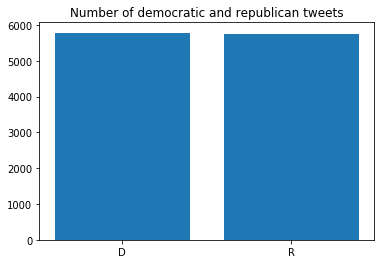

In [3]:
dataset = pd.read_csv('data.csv', sep = '^', quoting=csv.QUOTE_NONE, encoding='utf-8', header=0)
count=Counter(line[0] for line in dataset['party'])
print(count)
plt.bar(count.keys(),count.values())
plt.title('Number of democratic and republican tweets')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11543 entries, 0 to 11542
Data columns (total 2 columns):
party      11543 non-null object
content    11543 non-null object
dtypes: object(2)
memory usage: 180.4+ KB


### Data Cleaning

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [7]:
corpus = []
for i in range(0, 11543):
    review = re.sub('[^a-zA-Z]', ' ', dataset['content'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

### Feature Extraction

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(corpus).toarray()
y = dataset['party'].values

### Data splitting method 1 choose 4th every 5 sentences

In [9]:
index = []
for ii in range(0, 11543):
    index.append(ii)
rIndex = index[4::5]

X_test = X[4::5]
X_train = X 
X_train = np.delete(X_train, rIndex, axis = 0)
y_test = y[4::5]
y_train = y 
y_train = np.delete(y_train, rIndex)

In [11]:
print(len(X_test), len(X_train), len(y_test), len(y_train))
y_test=y_test.reshape((2308,1))

2308 9235 2308 9235


### Classification and Evaluation
### 1. KNN

[[848 309]
 [562 589]]
                  precision    recall  f1-score   support

Democratic Party       0.68      0.82      0.74      4628
Republican Party       0.77      0.62      0.69      4607

     avg / total       0.73      0.72      0.72      9235

                  precision    recall  f1-score   support

Democratic Party       0.60      0.73      0.66      1157
Republican Party       0.66      0.51      0.57      1151

     avg / total       0.63      0.62      0.62      2308



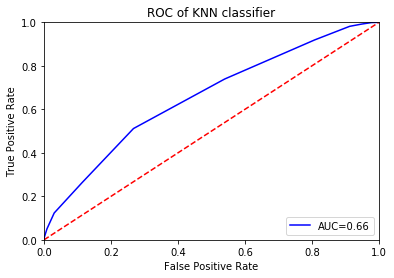

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y0_pred=knn.predict(X_test)
y0_predict=knn.predict(X_train)
print(confusion_matrix(y_test, y0_pred))
print(classification_report(y_train,y0_predict))
print(classification_report(y_test,y0_pred))

knnscore=knn.fit(X_train, y_train).predict_proba(X_test) 
fpr,tpr,threshold= roc_curve(ytest,knnscore[:,1])
roc_auc=auc(fpr,tpr)
plt.title('ROC of KNN classifier')
plt.plot(fpr, tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2. Random Forest

In [12]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

(2308, 1)
[[895 262]
 [388 763]]
                  precision    recall  f1-score   support

Democratic Party       0.98      0.99      0.99      4628
Republican Party       0.99      0.98      0.99      4607

     avg / total       0.99      0.99      0.99      9235

                  precision    recall  f1-score   support

Democratic Party       0.70      0.77      0.73      1157
Republican Party       0.74      0.66      0.70      1151

     avg / total       0.72      0.72      0.72      2308



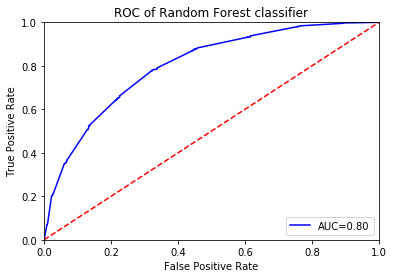

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_predict=rf_classifier.predict(X_train)
y_pred_rf = rf_classifier.predict(X_test)
print(y_test.shape)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_train,y_predict))
print(classification_report(y_test, y_pred_rf))

ytest,ypredrf=np.zeros((2308,1)),np.zeros((2308,1))
ytest[y_test=='Democratic Party']=0
ytest[y_test=='Republican Party']=1
rfscore=rf_classifier.fit(X_train, y_train).predict_proba(X_test) 
fpr,tpr,threshold= roc_curve(ytest,rfscore[:,1])
roc_auc=auc(fpr,tpr)
plt.title('ROC of Random Forest classifier')
plt.plot(fpr, tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 3. Naive Bayes

[[733 424]
 [208 943]]
                  precision    recall  f1-score   support

Democratic Party       0.86      0.71      0.78      4628
Republican Party       0.75      0.89      0.81      4607

     avg / total       0.81      0.80      0.79      9235

                  precision    recall  f1-score   support

Democratic Party       0.78      0.63      0.70      1157
Republican Party       0.69      0.82      0.75      1151

     avg / total       0.73      0.73      0.72      2308



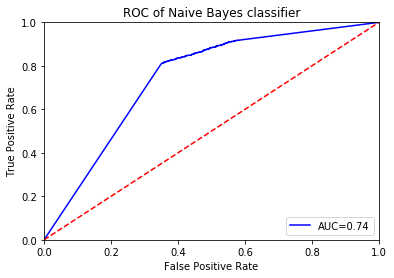

In [14]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_predict=nb_classifier.predict(X_train)
y_pred_nb = nb_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_train,y_predict))
print(classification_report(y_test, y_pred_nb))

nbscore=nb_classifier.fit(X_train, y_train).predict_proba(X_test) 
fpr,tpr,threshold= roc_curve(ytest,nbscore[:,1])
roc_auc=auc(fpr,tpr)
plt.title('ROC of Naive Bayes classifier')
plt.plot(fpr, tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4. MLP

In [16]:
from sklearn.neural_network import MLPClassifier
nn_classifier = MLPClassifier(hidden_layer_sizes = (600,2), activation='relu', solver='adam', verbose=True, learning_rate = 'constant', max_iter=500)
nn_classifier.fit(X_train, y_train)
y_pred_nn = nn_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Iteration 1, loss = 0.61081538
Iteration 2, loss = 0.44165349
Iteration 3, loss = 0.35092986
Iteration 4, loss = 0.27988417
Iteration 5, loss = 0.23580446
Iteration 6, loss = 0.20590503
Iteration 7, loss = 0.18637690
Iteration 8, loss = 0.17291709
Iteration 9, loss = 0.16300112
Iteration 10, loss = 0.15475218
Iteration 11, loss = 0.14716036
Iteration 12, loss = 0.14135029
Iteration 13, loss = 0.13587880
Iteration 14, loss = 0.13092958
Iteration 15, loss = 0.12642970
Iteration 16, loss = 0.12260461
Iteration 17, loss = 0.11863279
Iteration 18, loss = 0.11550754
Iteration 19, loss = 0.11231566
Iteration 20, loss = 0.10911101
Iteration 21, loss = 0.10632419
Iteration 22, loss = 0.10397430
Iteration 23, loss = 0.10104512
Iteration 24, loss = 0.09892068
Iteration 25, loss = 0.09668501
Iteration 26, loss = 0.09495646
Iteration 27, loss = 0.09260270
Iteration 28, loss = 0.09048522
Iteration 29, loss = 0.08885695
Iteration 30, loss = 0.08752782
Iteration 31, loss = 0.08581012
Iteration 32, los

Iteration 1, loss = 0.63742391
Iteration 2, loss = 0.45491955
Iteration 3, loss = 0.35932188
Iteration 4, loss = 0.28372922
Iteration 5, loss = 0.22538968
Iteration 6, loss = 0.18576246
Iteration 7, loss = 0.15919112
Iteration 8, loss = 0.14167920
Iteration 9, loss = 0.13003574
Iteration 10, loss = 0.12021017
Iteration 11, loss = 0.11365309
Iteration 12, loss = 0.10833977
Iteration 13, loss = 0.10285598
Iteration 14, loss = 0.09846808
Iteration 15, loss = 0.09496061
Iteration 16, loss = 0.09121353
Iteration 17, loss = 0.08788447
Iteration 18, loss = 0.08505357
Iteration 19, loss = 0.08221177
Iteration 20, loss = 0.08019642
Iteration 21, loss = 0.07776478
Iteration 22, loss = 0.07549999
Iteration 23, loss = 0.07342036
Iteration 24, loss = 0.07208236
Iteration 25, loss = 0.06965199
Iteration 26, loss = 0.06802942
Iteration 27, loss = 0.06630608
Iteration 28, loss = 0.06478833
Iteration 29, loss = 0.06296478
Iteration 30, loss = 0.06296475
Iteration 31, loss = 0.06081382
Iteration 32, los

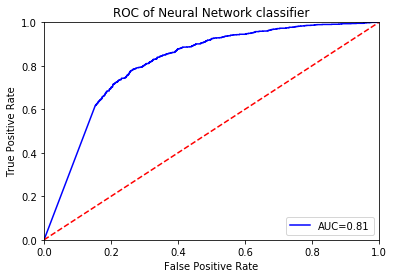

In [274]:
nnscore=nn_classifier.fit(X_train, y_train).predict_proba(X_test) 
fpr,tpr,threshold= roc_curve(ytest,nnscore[:,1])
roc_auc=auc(fpr,tpr)
plt.title('ROC of Neural Network classifier')
plt.plot(fpr, tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5. Pipeline in TF-IDF

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
pipeline = Pipeline([('vectorizer', CountVectorizer()),('tfidf', TfidfTransformer()), ('mlp', MLPClassifier(hidden_layer_sizes=(100,2)))])

In [19]:
x1 = dataset['content'][:11544]
y1 = dataset['party'][:11544]
x1[:5]

0     House Passes National Defense Authorization Act:
1    Today I called on Gov. Walker and AG Schimel t...
2    is total devastation. Tonight at the EOC I was...
3    As we fight to protect the health of neighbors...
4    This is horrifying. Immigration authorities ar...
Name: content, dtype: object

### Data splitting method 2 pick 20% randomly

In [20]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [21]:
pipeline.fit(x1_train, y1_train)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [22]:
predictions = pipeline.predict(x1_test)
print(classification_report(y1_test, predictions))

                  precision    recall  f1-score   support

Democratic Party       0.74      0.77      0.75      1124
Republican Party       0.77      0.74      0.76      1185

     avg / total       0.76      0.75      0.75      2309



### 6. SVM

In [122]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}]
score='recall'
print("# Tuning hyper-parameters for %s" % score)
clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                   scoring='%s_macro' % score)
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

# Tuning hyper-parameters for recall
Best parameters set found on development set:
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Grid scores on development set:
0.686 (+/-0.019) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.723 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.686 (+/-0.018) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.733 (+/-0.021) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.724 (+/-0.017) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.720 (+/-0.025) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.731 (+/-0.022) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
                  precision    recall  f1-score   support

Democratic Party       0.76      0.73      0.74      1157
Republican Party       0.74      0.76      0.75      1151

     avg / 